<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random
from numpy.core.numeric import NaN

In [2]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [3]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

Response Time Function:
This function recieves a set of parameters (n, k, global signal, local signal, intention, global and local probabilities, congruence, boundary) and returns the time required to reach a boundary and which boundary was reached (global or local).


In [4]:
#RT function, same as in R
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [5]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    base_array = np.zeros(N)
    accuracy_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    RT_array = np.array([accuracy_by_con(xi) for xi in base_array])
    df = pd.DataFrame(data=RT_array, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = base_array
    total = df['right'].sum()
    return total/N

#This function returns the fraction of times (out of N) a global boundary was reached based on the signal, n, and probability. 
#The function creates a dataframe but does not return the dataframe.   


In [6]:
#creates dictionary of parameters

def dict_by_param(par = 'p_global', N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
  #print('hello')
  dict_of_param = {'N':N, 'global_s':global_s,'local_s':local_s, 'n':n, 'p_global':p_global}
  #print(dict_of_param)
  return dict_of_param


In [30]:
def df_accuracy_by_param(min = 1, max = 61, step =1, f_param= 'p_global', N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
  dict_for_param =dict_by_param(N=N, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
  base_array = np.arange(min, max, step)
  new_array = []
  for i in base_array:
    dict_for_param[f_param]=i
    print(dict_for_param)
    acc=df_accuracy(**dict_for_param)
    print(acc)
    new_array.append(acc)
  return new_array


print(df_accuracy_by_param(f_param = 'local_s', min = 0.25, max=0.5, step = 0.01, n=6, p_global=18)) 

{'N': 100, 'global_s': 0.55, 'local_s': 0.25, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.26, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.27, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.28, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.29000000000000004, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.30000000000000004, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.31000000000000005, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.32000000000000006, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.33000000000000007, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.3400000000000001, 'n': 6, 'p_global': 18}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.3500000000000001, 'n': 6, 'p_global': 18}
0.96
{'N': 100, 'global_s': 0.55, 'local_s': 0.3600000000000001, 'n': 6, 'p_global': 18

In [8]:
def df_accuracy_by_param_mult(param_x = 'n', min_x=1, max_x=17, step_x=1, param_a= 'p_global', min_a=1, max_a=20, step_a=3, N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
  dict_for_param =dict_by_param(N=N, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
  array_for_x = np.arange(min_x,max_x,step_x)
  array_for_a = np.arange(min_a, max_a, step_a)
  new_array = []
  for p in array_for_x:
    same_x_array = []
    dict_for_param[param_x]=p
    for a in array_for_a:
      dict_for_param[param_a]=a
      print(dict_for_param)
      acc=df_accuracy(**dict_for_param)
      print(acc)
      same_x_array.append(acc)
      print(same_x_array)
    new_array.append(same_x_array)
  print(new_array)
  return


print(df_accuracy_by_param_mult())





{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 1}
0.0
[0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 4}
0.0
[0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 7}
0.0
[0.0, 0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 10}
0.0
[0.0, 0.0, 0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 13}
0.0
[0.0, 0.0, 0.0, 0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 16}
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 19}
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 2, 'p_global': 1}
0.0
[0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 2, 'p_global': 4}
0.0
[0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 2, 'p_global': 7}
0.0
[0.0, 0.0, 0.0]
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 2, 'p_global': 10}
0.0
[0.0, 0.0, 0

In [22]:

#just tests - not neccessary

'''
def dict_by_param(par = 'p_global', min= 1, max = 61, step = 1, N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
  print('hello')
  dict_of_param = {'N':N, 'global_s':global_s,'local_s':local_s, 'n':n, 'p_global':p_global}
  print(dict_of_param)
  for a in dict_of_param:
    if a==par:
      dict_of_param[a] = 'x'
  print(dict_of_param)

  return dict_of_param

new_dict = dict_by_param()
print(new_dict)

def df_accuracy_by_param(min = 1, max = 61, step =1, f_param= 'p_global'):
  dict_for_param =dict_by_param(par=f_param)
  base_array = np.arange(min, max, step)
  new_array = []
  for i in base_array:
    dict_for_param[f_param]=i
    print(dict_for_param)
    acc=df_accuracy(**dict_for_param)
    print(acc)
    new_array.append(acc)
  return new_array


print(df_accuracy_by_param(f_param = 'n', max = 15))  










#print("accuracy is", df_accuracy(**new_dict))



'''


hello
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 12, 'p_global': 50}
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 12, 'p_global': 'x'}
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 12, 'p_global': 'x'}
hello
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 12, 'p_global': 50}
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 'x', 'p_global': 50}
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 1, 'p_global': 50}
0.75
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 2, 'p_global': 50}
0.83
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 3, 'p_global': 50}
0.97
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 4, 'p_global': 50}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 5, 'p_global': 50}
0.99
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 6, 'p_global': 50}
1.0
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 7, 'p_global': 50}
0.99
{'N': 100, 'global_s': 0.55, 'local_s': 0.45, 'n': 8, 'p_global': 50}
1.0
{'N': 100, 'global_s': 0.55, 'loc

In [11]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    print(ar2)
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('Global Probability')
    plt.ylabel('Accuracy (For Global)')
    return plt.show()

print(plot_acc_by_prob())

[ 3  5  7  9 11 13 15 17 19 21 23]
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.02]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.03]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.05, 0.1 ]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.09, 0.36]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.04, 0.07, 0.23, 0.56]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.06, 0.21, 0.57, 0.71]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.04, 0.11, 0.47, 0.8 , 0.94]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.14, 0.38, 0.78, 0.94, 0.97]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.3

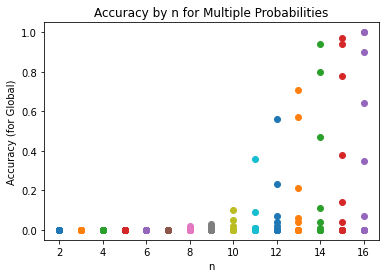

None


In [12]:
def plot_acc_for_mult_prob_by_n(N=100, probmin=3, probmax=25, nmin=2, nmax=17, pstep = 2, nstep=1, global_s=0.55, local_s=0.45):
  prob_array = np.array(range(probmin,probmax,pstep))
  print(prob_array)
  n_array = np.array(range(nmin, nmax, nstep))
  lst_for_plot=[]
  for n in n_array:
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    array_of_prob_for_single_n = np.array([acc_by_prob(yi) for yi in prob_array])
    lst_for_plot.append(array_of_prob_for_single_n)
  print(lst_for_plot)
  for xe, ye in zip(n_array, lst_for_plot):
    plt.scatter([xe]*len(ye), ye)
  
  plt.title('Accuracy by n for Multiple Probabilities')
  plt.xlabel('n')
  plt.ylabel('Accuracy (for Global)')
  return plt.show()

print(plot_acc_for_mult_prob_by_n())





[ 3  5  7  9 11 13 15 17 19 21 23]
[0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46]
[array([0.01, 0.85, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.72, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.  , 0.35, 0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.  , 0.  , 0.11, 0.71, 0.97, 0.99, 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.  , 0.  , 0.01, 0.03, 0.24, 0.67, 0.92, 0.98, 1.  ]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.08, 0.23, 0.7 , 0.92]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.06, 0.21]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.04]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]


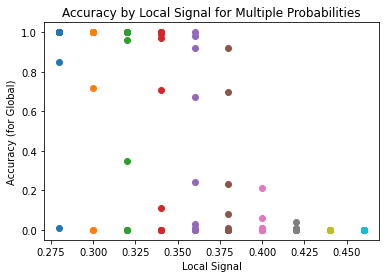

None
[ 3  5  7  9 11 13 15 17 19 21 23]
[0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46]
[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([0.93, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]), array([0.  , 0.01, 0.13, 0.85, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.  , 0.02, 0.1 , 0.6 , 0.91, 0.97, 1.  , 1.  , 1.  ]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.04, 0.2 , 0.52, 0.8 , 0.93]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.07, 0.16])]


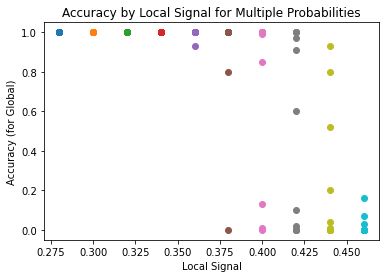

None


In [ ]:
def plot_acc_for_mult_prob_by_loc_sig(N=100, probmin=3, probmax=25, locmin=0.28, locmax=0.48, pstep = 2, locstep=0.02, n=6, global_s=0.55):
  prob_array = np.array(range(probmin,probmax,pstep))
  print(prob_array)
  loc_sig_array = np.arange(locmin, locmax, locstep)
  print(loc_sig_array)
  lst_for_plot=[]
  for sig in loc_sig_array:
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=sig, n=n)
    array_of_prob_for_single_loc_sig = np.array([acc_by_prob(yi) for yi in prob_array])
    lst_for_plot.append(array_of_prob_for_single_loc_sig)
  print(lst_for_plot)
  for xe, ye in zip(loc_sig_array, lst_for_plot):
    plt.scatter([xe]*len(ye), ye)
  
  plt.title('Accuracy by Local Signal for Multiple Probabilities')
  plt.xlabel('Local Signal')
  plt.ylabel('Accuracy (for Global)')
  return plt.show()

print(plot_acc_for_mult_prob_by_loc_sig())

print(plot_acc_for_mult_prob_by_loc_sig(n=12))

Accuracy by Probability Plot:

This plot shows the accuracy (fraction of times global boundaries are reached) by the global probability. Other parameters can be altered to show how they affect the accuracy.

Altering N alters the amount of times RT is called for each set of parameters.





In [ ]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x7fed289f8f80>


In [ ]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon_array = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon_array])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    right_cat = ['1', '0']
    df['right'] = np.where(df['intention'] == df['answer'], '1', '0')
    df['right'] = df['right'].astype('category')
    df['right']=df['right'].cat.set_categories(right_cat)


    df['con'] = incon_array
    #print('whole dataframe', '\n' , df)
    df['time'] = pd.to_numeric(df['time'])
    #df1 = df.loc[lambda df: df['right'] == 1]
    #accuracy = df1.shape[0]/N
    #print('acc by cut', accuracy)
    mean_by_right = df[['right', 'time']].groupby('right').agg(['count', 'mean']).reset_index()
    #print("mean by right and wrong", '\n', mean_by_right)
    #print(list(mean_by_right.columns))  
    #print(mean_by_right.shape)

    accuracy_of_right_decisions = mean_by_right[mean_by_right[('right','')] == '1'][('time', 'count')].values[0]/N
    average_of_right_decisions = mean_by_right[mean_by_right[('right','')] == '1'][('time', 'mean')].values[0]
    average_of_false_decisions = mean_by_right[mean_by_right[('right','')] == '0'][('time', 'mean')].values[0]
    
     



    return accuracy_of_right_decisions, average_of_right_decisions, average_of_false_decisions 

    
#This function creates a dataframe that returns the average RT of "right" decisions (by the intention set), the average of "false" decisions and the accuracy of the right decisions.


print('av time is',df_average(n=12, p_global = 12))

av time is (0.0, nan, 47.41)


[[12.78, 13.5, 14.65, 15.95, 17.75, 19.45, 22.51, 24.18], [12.98, 13.96, 15.26, 17.68, 18.29, 19.29, 23.61, 27.75], [14.01, 15.66, 16.74, 18.26, 21.53, 23.44, 28.09, 33.75], [15.28, 16.52, 18.57, 21.34, 22.69, 26.58, 31.54, 38.41], [16.64, 18.06, 20.04, 22.08, 25.58, 28.55, 35.77, 44.38383838383838], [17.08, 19.72, 22.06, 24.64, 28.64, 33.79, 43.8, 59.51], [19.13, 21.78, 24.41, 27.85, 32.48, 37.93, 53.795918367346935, 67.57575757575758], [20.18, 22.96, 27.43, 31.83, 41.62, 47.56565656565657, 64.5, 85.11363636363636], [22.11, 25.16, 28.92, 36.54, 48.93, 61.55, 84.5, 110.3375], [24.61, 28.73, 34.89, 44.58, 58.86868686868687, 67.73737373737374, 109.14772727272727, 126.21311475409836], [27.28, 32.71, 39.98, 49.26, 70.57575757575758, 107.3125, 142.6164383561644, 154.71428571428572], [29.57, 33.52, 47.01, 59.71, 98.09278350515464, 145.51764705882354, 162.91836734693877, 153.41666666666666], [33.28, 40.8, 49.44, 77.07, 108.63917525773196, 159.70149253731344, 135.94736842105263, 132.6666666666

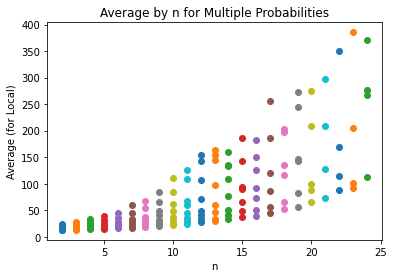

None


In [ ]:
def plot_average_of_mult_prob_by_n(N=100, nmin=2, nmax=25, nstep = 1, probmin=3, probmax=25, probstep=3, global_s=0.55, local_s=0.45, intention = 'local'):
    n_range = np.array(range(nmin,nmax,nstep))
    prob_range = np.array(range(probmin,probmax,probstep))
    lst_for_plot=[]
    for n in n_range:
      av_by_prob = lambda y: df_average(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n, intention=intention)
      ar_av = np.array([av_by_prob(yi) for yi in prob_range])
    
      average_for_plot = ar_av[:,1] 
      average_for_plot_float_array = [float(i) for i in average_for_plot]
      lst_for_plot.append(average_for_plot_float_array)
    
    print(lst_for_plot)

    for xe, ye in zip(n_range, lst_for_plot):
      plt.scatter([xe]*len(ye), ye)
  
    plt.title('Average by n for Multiple Probabilities')
    plt.xlabel('n')
    plt.ylabel('Average (for Local)')
    return plt.show()

print(plot_average_of_mult_prob_by_n()) 
#we should add to this function only those where the accuracy is higher than 80%   


Average Response Time Graphs:

The graphs below simulate the average amount of time required until the "correct" boundary is reached (by the predetermined intention) by 'n'. If an incorrect boundary is reached, the response time is not included in the average calculation.

The first graph simulates only for one group (either with a global or local intention). The second graph simulates the difference between two groups, one with a global intention and the other with a local intention. This difference shows how much longer it takes on average to reach a local boundary than a global one (with different probabilities for each group).


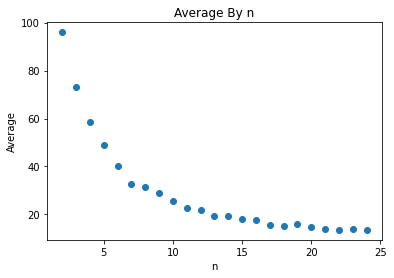

Global Intention by n (global prob. = 0.48) 
 (None, [96.0, 73.22826086956522, 58.638297872340424, 49.01020408163265, 40.25, 32.58, 31.44, 28.92, 25.54, 22.72, 21.74, 19.45, 19.12, 18.17, 17.53, 15.58, 15.1, 16.16, 14.89, 13.77, 13.68, 13.95, 13.52], array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]))


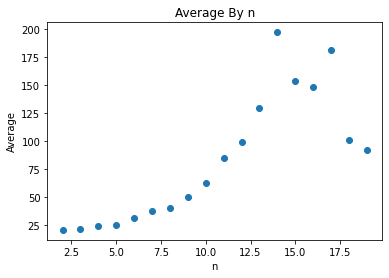

Local Intention by n (global prob. = 0.18) 
 (None, [20.49, 21.02, 24.17, 25.3, 31.27, 37.16, 39.91, 49.81, 62.24242424242424, 85.10309278350516, 99.34736842105264, 129.39080459770116, 197.36923076923077, 153.51282051282053, 148.76923076923077, 181.33333333333334, 101.33333333333333, 92.0, nan, nan, nan, nan, nan], array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]))


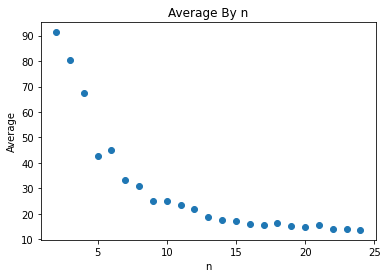

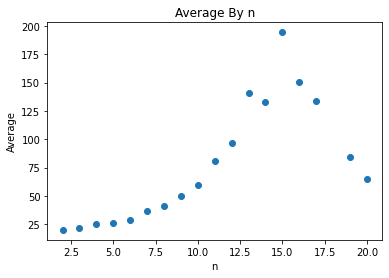

(91.28787878787878, 19.95)
(80.25, 21.55)
(67.61855670103093, 25.06)
(42.78, 26.39)
(45.204081632653065, 28.73)
(33.39, 36.49)
(30.92, 41.42)
(24.9, 50.05)
(25.04, 59.56)
(23.46, 81.02020202020202)
(22.04, 97.08421052631579)
(18.93, 140.5581395348837)
(17.47, 132.82608695652175)
(17.1, 194.4)
(16.23, 150.07142857142858)
(15.54, 134.0)
(16.26, nan)
(15.17, 84.0)
(14.82, 65.0)
(15.53, nan)
(14.28, nan)
(13.96, nan)
(13.74, nan)
[-71.33787878787878, -58.7, -42.55855670103092, -16.39, -16.474081632653064, 3.1000000000000014, 10.5, 25.15, 34.52, 57.56020202020202, 75.0442105263158, 121.6281395348837, 115.35608695652175, 177.3, 133.8414285714286, 118.46000000000001, nan, 68.83, 50.18, nan, nan, nan, nan]


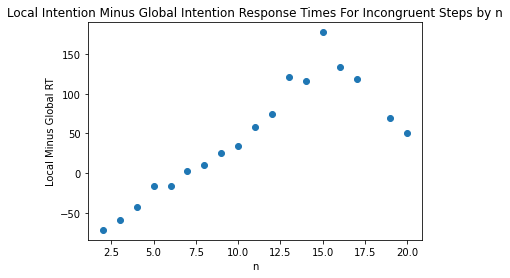

None


In [ ]:
#graph of averages by n, graph of global precedence by n
def plot_average_by_n(N=100, min=2, max=25, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y, intention=intention)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    #print(ar_av)
    average_for_plot = ar_av[:,1]
    average_for_plot_float_array = [float(i) for i in average_for_plot]
    #print("average for plot:", '\n', average_for_plot_float_array)

    plt.scatter(n_range, average_for_plot_float_array)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    plot = plt.show()
    return plot, average_for_plot_float_array, n_range


print("Global Intention by n (global prob. = 0.48)", '\n', plot_average_by_n(p_global=48, intention = 'global'))
print("Local Intention by n (global prob. = 0.18)", '\n', plot_average_by_n(p_global=18, intention = 'local'))  


#This function uses the averages created by df_average based on each n given.
#It returns a plot, and also the list of averages used to create the plot (y values), and the range of n used (x valuse).

def plot_almost_global_precedence_by_n(p_global_for_global=48, p_global_for_local=18 ):
  p1, global_array_by_n, n_range = plot_average_by_n(p_global=p_global_for_global, intention = 'global')
  p2, local_array_by_n, n_range_2 = plot_average_by_n(p_global = p_global_for_local, intention = 'local')
  almost_global_precedence_list = []
  for i in zip(global_array_by_n, local_array_by_n):
    print(i)
    if np.nan in i: 
      almost_global_precedence_list.append(np.nan)
    else:
      almost_global_precedence_list.append(i[1]-i[0])
  print(almost_global_precedence_list)    
  plt.scatter(n_range, almost_global_precedence_list) 
  plt.ylabel('Local Minus Global RT') 
  plt.xlabel('n') 
  plt.title("Local Intention Minus Global Intention Response Times For Incongruent Steps by n")
  plt.show()
  return

print(plot_almost_global_precedence_by_n())  
#This function recieves two parameters - the probability in the case of a global intention, and the probability in the case of a local intention.
#Then, plot_average_by_n is run for each intention, and the arrays are subtracted from each other (local minus global) to give an idea of the global precedence by each n.
#This is not completely global precedence - because congruent steps are not taken into account.

      



# Finding the "best" probability for all signals:

Our goal was to attempt to find a probability suitable for more than just one set of predetermined signals.

Therefore, in order to further understand the probability parameter, we created a function that checks multiple sets of signals under one probability (and a set n), and returns the amount of times the local bound was reached at least 80% of times.

In other words, we tried to find an "optimal" probability for most of the signals, meaning that changing the signals would not result in altered accuracy (as is the case for the global-local task).

We found that for n=6, the probabilities seem more flexible for each signal than for n=12. 





[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67 0.69]
135
[0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46
 0.48]
[[0.53, 0.2, False, 1.0, 399.6, 'none'], [0.53, 0.22, False, 1.0, 397.29, 'none'], [0.53, 0.24, False, 1.0, 404.76, 'none'], [0.53, 0.26, False, 1.0, 373.49, 'none'], [0.53, 0.27999999999999997, False, 1.0, 399.28, 'none'], [0.53, 0.29999999999999993, False, 1.0, 477.96, 'none'], [0.53, 0.31999999999999995, False, 1.0, 571.98, 'none'], [0.53, 0.33999999999999997, False, 0.99, 1263.7070707070707, 1917.0], [0.53, 0.35999999999999993, True, 0.01, 1996.0, 1041.3434343434344], [0.53, 0.3799999999999999, True, 0, 'none', 236.38], [0.53, 0.3999999999999999, True, 0, 'none', 102.53], [0.53, 0.41999999999999993, True, 0, 'none', 54.12], [0.53, 0.4399999999999999, True, 0, 'none', 31.98], [0.53, 0.4599999999999999, True, 0, 'none', 20.73], [0.53, 0.47999999999999987, True, 0, 'none', 14.58], [0.55, 

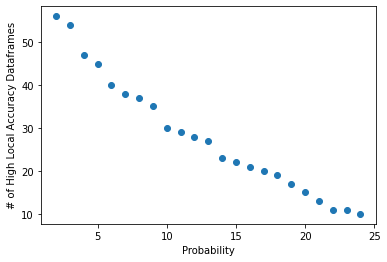

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67 0.69]
135
[0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46
 0.48]
[[0.53, 0.2, False, 1.0, 711.96, 'none'], [0.53, 0.22, False, 1.0, 1066.02, 'none'], [0.53, 0.24, False, 0.46, 3263.021739130435, 3507.962962962963], [0.53, 0.26, True, 0, 'none', 696.55], [0.53, 0.27999999999999997, True, 0, 'none', 281.77], [0.53, 0.29999999999999993, True, 0, 'none', 160.66], [0.53, 0.31999999999999995, True, 0, 'none', 98.57], [0.53, 0.33999999999999997, True, 0, 'none', 66.86], [0.53, 0.35999999999999993, True, 0, 'none', 45.56], [0.53, 0.3799999999999999, True, 0, 'none', 34.12], [0.53, 0.3999999999999999, True, 0, 'none', 26.48], [0.53, 0.41999999999999993, True, 0, 'none', 21.15], [0.53, 0.4399999999999999, True, 0, 'none', 16.78], [0.53, 0.4599999999999999, True, 0, 'none', 14.49], [0.53, 0.47999999999999987, True, 0, 'none', 12.45], [0.55, 0.2, False, 1.0, 605.16

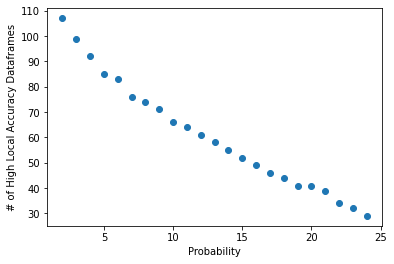

In [ ]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2, av_bound = 100, n=12, prob_min =2, prob_max = 25):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy", "av global", "av local" ]


    prob_array = np.array(range(prob_min,prob_max,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d_for_accuracy = []
        for x in glob_array:
            for y in loc_array:
              acc, av_global, av_local = df_average(N=100, global_s=x, local_s=y, p_global=p, n=n)
              if acc > acc_bound:
                  d_for_accuracy.append([x,y,False, acc, av_global, av_local])
              else:
                  d_for_accuracy.append([x,y,True, acc, av_global, av_local])
        print(d_for_accuracy)
        prob_work_array = np.array([d_for_accuracy[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_of_true_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.xlabel("Probability")
    plt.ylabel("# of High Local Accuracy Dataframes")
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df(n=12)
optimal_prob_df(n=6)
#This is a new function trying to answer the question - is there a probability that would work for more signals than the signals we use? 
#The plot returning demonstrates the number of times a combination of global signal, local signal and probability was able to reach local boundaries "most of the time".

In [ ]:
#optimal_prob_by_average
def optimal_prob_by_average(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, average_bound = 200):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array_for_av = np.arange(globalmin,globalmax,0.02)
    print(glob_array_for_av)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array_for_av)*len(loc_array_for_av)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return